<a href="https://colab.research.google.com/github/Sohamnawale/website/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv('/content/drive/My Drive/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data.shape

(418, 12)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
data.isnull().count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin          418
Embarked       418
dtype: int64


Handling the Missing Values

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Fare']=data['Fare'].fillna(data['Fare'].mean())

In [ ]:
category=['Embarked','Sex']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
category=encoder.fit_transform(category)

In [ ]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


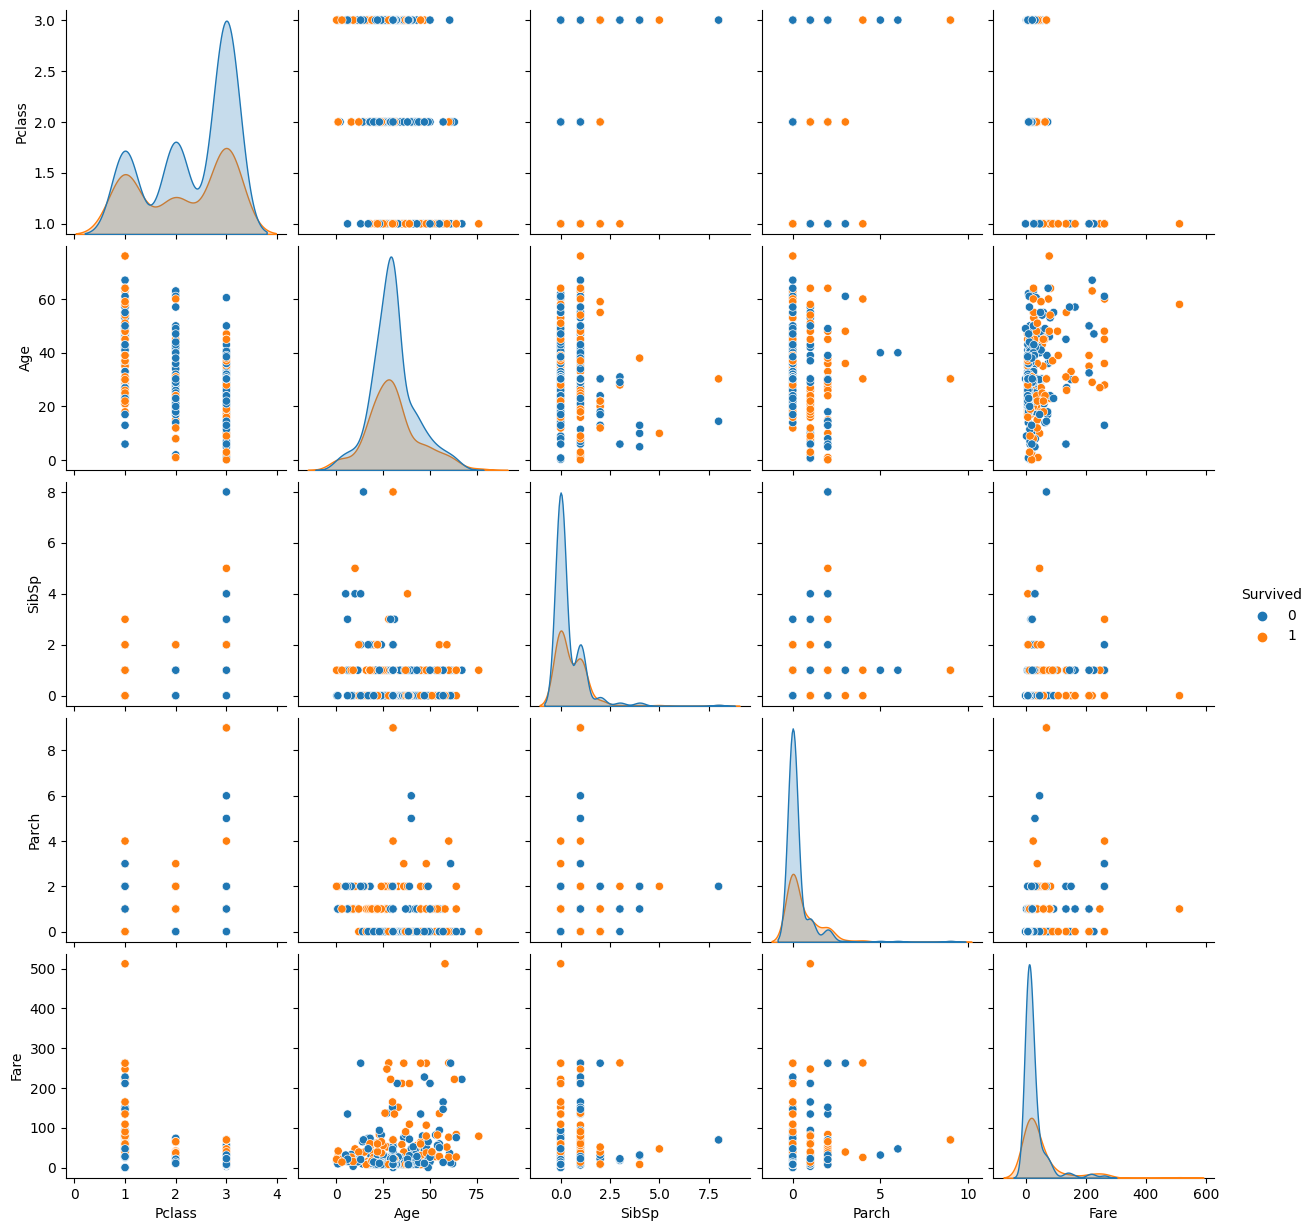

In [ ]:
sns.pairplot(data,hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

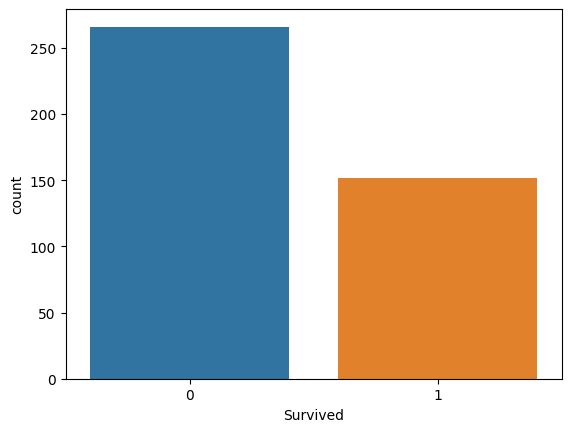

In [ ]:
sns.countplot(x='Survived',data=data)

In [ ]:

data = pd.DataFrame(data)
data['Embarked'] = data['Embarked'].map({'Q': 1, 'S': 0,'C': 2})


print(data)


     Survived  Pclass     Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    male  34.50000      0      0    7.8292         1
1           1       3  female  47.00000      1      0    7.0000         0
2           0       2    male  62.00000      0      0    9.6875         1
3           0       3    male  27.00000      0      0    8.6625         0
4           1       3  female  22.00000      1      1   12.2875         0
..        ...     ...     ...       ...    ...    ...       ...       ...
413         0       3    male  30.27259      0      0    8.0500         0
414         1       1  female  39.00000      0      0  108.9000         2
415         0       3    male  38.50000      0      0    7.2500         0
416         0       3    male  30.27259      0      0    8.0500         0
417         0       3    male  30.27259      1      1   22.3583         2

[418 rows x 8 columns]


In [ ]:
data['Sex']=data['Sex'].map({'male':1,'female':0})

In [ ]:
xcols = ['Pclass',	'Sex',	'Age'	,'SibSp',	'Parch',	'Fare'	,'Embarked']
ycols = ['Survived']

In [ ]:
X = data[xcols]
y = data[ycols]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,classification_report


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

<ipython-input-42-cee295a69225>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


In [ ]:
acc= accuracy_score(y_test,y_pred)
acc


1.0

In [ ]:
precision = precision_score(y_test,y_pred)
precision

1.0

In [ ]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        39

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

